In [1]:
import warnings
warnings.filterwarnings("ignore")
import MS
import scanpy as sc


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


### load the dataset

In [2]:
import pysodb
sodb = pysodb.SODB()
adata_dict = sodb.load_dataset('Dataset6_MS_raw')
adata = list(adata_dict.values())[0]

download experiment[Dataset6] in dataset[Dataset6_MS_raw]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.04M/1.04M [00:00<00:00, 26.9MB/s]

load experiment[Dataset6] in dataset[Dataset6_MS_raw] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/ysodb/cache/Dataset6_MS_raw/Dataset6.h5ad


In [3]:
print('data size:',adata.shape)

data size: (1053, 166)


## MS

In [4]:
# initialize the MS object
ms = MS.MS(
    adata
)

# set the number of scales, default is 15
ms.set_MS_para(
    n_scales=15
)

# construct the context-aware representation
ms.k_representation_mp()


In [5]:
# identify tissue structure given the number of k
k_expected = len(adata.obs['gt'].cat.categories)
ms.run_clustering_normal(
    k_expected 
    # the clustering parameter
    # positive value for the number of clusters
    # negative value for the clustering resolution
)

searching resolution to k=4
Res =  0.1 Num of clusters =  3
Res =  0.2 Num of clusters =  5
Res changed to 0.1
Res =  0.15000000000000002 Num of clusters =  4
recommended res =  0.15000000000000002


## output results

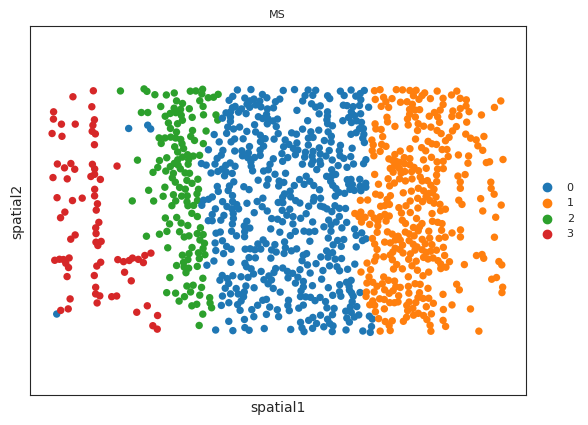

In [6]:
# the result of MS
ms.output_cluster('MS')

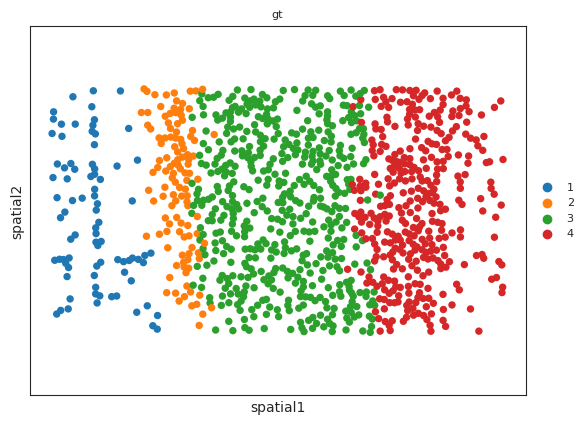

In [7]:
# ground truth
ms.output_cluster('gt')

## external application: Pseudo-space analysis

In [8]:
ms.run_pspace()

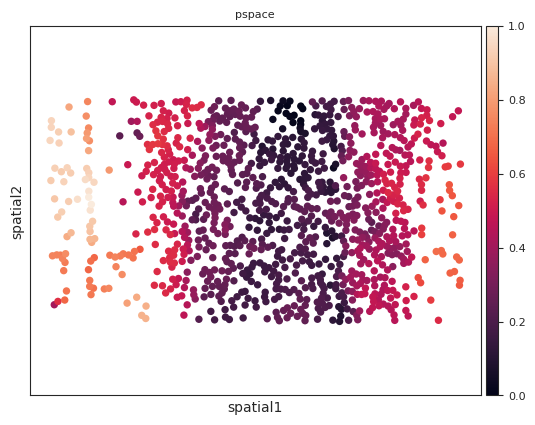

In [9]:
ms.output_pspace()

## external application: Tissue Visualization via MS-View

In [10]:
ms.run_visualization_normal()

generating color coding...
1.0 0.0


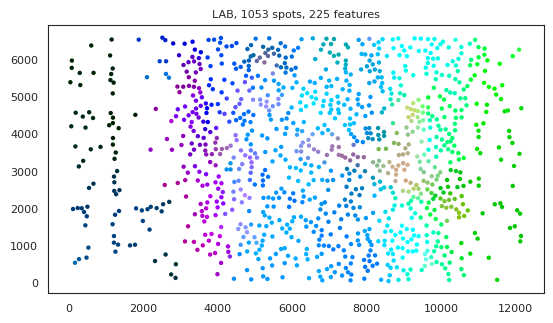

1.0 0.0


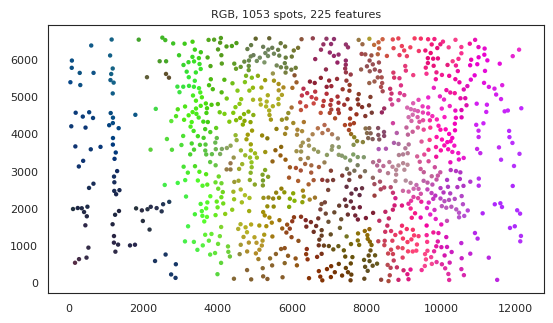

In [11]:
ms.output_visualization_single(
    dot_size=10
    # control the size of cell
)

In [12]:
# save results
ms.adata_MS.write_h5ad(f'process/{data_use}.h5ad')